In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Research Question 1
### What is the number and proportion of GitHub repositories that are using GitHub Actions workflows, categorized by their main programming language?

In [3]:
## The first dataset we will use contains information about GitHub repositories that make use of GitHub Actions workflows.

df_repositories = pd.read_csv('../datasets/repositories.csv')
df_repositories

,repository,branch,language,created,updated,commit,stars,watchers,forks,size,branches,commits,contributors,issues,prs
0,00-evan/shattered-pixel-dungeon,master,Java,2014-07-31 21:56:31,2022-01-13 23:41:31,5d1a2dce6b554b40f6737ead45d411fd98f4c67d,1803,83,580,69470,1,5165,2.0,859.0,33.0
1,0015/ideasnprojects,master,C++,2019-07-04 08:16:56,2021-03-10 05:31:05,bd09568e05e2790ce3f72905995e763600ff3903,332,39,253,1315,1,144,2.0,11.0,7.0
2,0015/thatproject,master,C,2019-07-04 08:16:56,2021-12-16 20:49:19,69c85b76c285e9b532b2237fbd4244fd6e7e7820,629,68,447,2160,5,208,2.0,0.0,13.0
3,007gzs/dingtalk-sdk,master,Python,2018-05-07 09:42:31,2021-06-03 12:49:51,7979da2e259fdbc571728cae2425a04dbc65850a,148,14,48,944,1,131,7.0,38.0,13.0
4,007gzs/meeting,master,Python,2019-07-02 09:14:00,2021-04-13 05:49:08,a1bea997e2849c03e2a3cfa724d036b6769e1abb,167,6,61,1051,2,104,2.0,17.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69142,zzzprojects/sqlfiddle,master,JavaScript,2012-01-18 08:25:59,2021-04-12 19:20:03,b0014899c1701e017bd87f826e8e369d163ef574,272,29,53,18666,9,530,3.0,76.0,4.0
69143,zzzprojects/sqlfiddle2,master,JavaScript,2014-04-20 22:44:28,2021-04-12 19:20:50,eb6694a8d8f4fcdda82b88bb0f426eb978c304e5,192,17,39,2035,2,192,2.0,32.0,3.0
69144,zzzprojects/sqlfiddle3,master,JavaScript,2016-12-26 19:27:27,2021-04-12 19:27:04,d4283d80b161ede014e49ee177e7d98098f6d583,245,16,44,1717,2,196,3.0,13.0,6.0
69145,zzzprojects/z.extensionmethods,master,C#,2015-03-03 14:49:23,2021-04-06 14:42:44,bdbec3f0924a01e9f638f1ec3c975bd9ff13beb0,844,95,214,6590,1,127,3.0,19.0,14.0


### Requirements : 
#### 1-First, preprocess the dataset by filtering on repositories with at least 100 stars AND more than 1 contributors
#### 2-Quantify the number of repositories, grouped by language
    Hint: Use the groupby operation from pandas. See https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
#### 3-Quantify the proportion of repositories per language
    Hint: proportion per langage = number of repositories per language / total number of repositories

In [4]:
q1 = df_repositories[df_repositories['stars'] >= 100]
q1 = q1[q1['contributors'] > 1]
q1

,repository,branch,language,created,updated,commit,stars,watchers,forks,size,branches,commits,contributors,issues,prs
0,00-evan/shattered-pixel-dungeon,master,Java,2014-07-31 21:56:31,2022-01-13 23:41:31,5d1a2dce6b554b40f6737ead45d411fd98f4c67d,1803,83,580,69470,1,5165,2.0,859.0,33.0
1,0015/ideasnprojects,master,C++,2019-07-04 08:16:56,2021-03-10 05:31:05,bd09568e05e2790ce3f72905995e763600ff3903,332,39,253,1315,1,144,2.0,11.0,7.0
2,0015/thatproject,master,C,2019-07-04 08:16:56,2021-12-16 20:49:19,69c85b76c285e9b532b2237fbd4244fd6e7e7820,629,68,447,2160,5,208,2.0,0.0,13.0
3,007gzs/dingtalk-sdk,master,Python,2018-05-07 09:42:31,2021-06-03 12:49:51,7979da2e259fdbc571728cae2425a04dbc65850a,148,14,48,944,1,131,7.0,38.0,13.0
4,007gzs/meeting,master,Python,2019-07-02 09:14:00,2021-04-13 05:49:08,a1bea997e2849c03e2a3cfa724d036b6769e1abb,167,6,61,1051,2,104,2.0,17.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69142,zzzprojects/sqlfiddle,master,JavaScript,2012-01-18 08:25:59,2021-04-12 19:20:03,b0014899c1701e017bd87f826e8e369d163ef574,272,29,53,18666,9,530,3.0,76.0,4.0
69143,zzzprojects/sqlfiddle2,master,JavaScript,2014-04-20 22:44:28,2021-04-12 19:20:50,eb6694a8d8f4fcdda82b88bb0f426eb978c304e5,192,17,39,2035,2,192,2.0,32.0,3.0
69144,zzzprojects/sqlfiddle3,master,JavaScript,2016-12-26 19:27:27,2021-04-12 19:27:04,d4283d80b161ede014e49ee177e7d98098f6d583,245,16,44,1717,2,196,3.0,13.0,6.0
69145,zzzprojects/z.extensionmethods,master,C#,2015-03-03 14:49:23,2021-04-06 14:42:44,bdbec3f0924a01e9f638f1ec3c975bd9ff13beb0,844,95,214,6590,1,127,3.0,19.0,14.0


In [5]:
g1 = q1.groupby('language').groups
g1

{'C': [2, 24, 26, 107, 182, 188, 207, 217, 228, 246, 334, 340, 347, 348, 353, 370, 377, 382, 386, 392, 405, 407, 447, 486, 492, 503, 544, 560, 571, 578, 604, 607, 610, 664, 667, 674, 675, 679, 777, 797, 801, 802, 804, 805, 807, 813, 814, 863, 897, 905, 913, 914, 972, 978, 1001, 1096, 1097, 1100, 1151, 1171, 1208, 1211, 1213, 1214, 1262, 1266, 1271, 1323, 1333, 1336, 1358, 1374, 1433, 1500, 1515, 1558, 1559, 1583, 1604, 1612, 1689, 1697, 1704, 1717, 1721, 1753, 1769, 1813, 1829, 1835, 1849, 1850, 1868, 1880, 1887, 1890, 1904, 1905, 1919, 1952, ...], 'C#': [30, 42, 111, 146, 185, 186, 194, 203, 210, 237, 300, 317, 341, 374, 388, 397, 404, 420, 426, 437, 439, 440, 441, 442, 448, 462, 464, 469, 476, 494, 501, 502, 517, 562, 625, 641, 734, 759, 765, 824, 827, 860, 872, 873, 874, 875, 876, 877, 882, 899, 918, 988, 1024, 1025, 1076, 1077, 1102, 1131, 1137, 1138, 1166, 1175, 1231, 1264, 1278, 1279, 1345, 1386, 1413, 1569, 1605, 1695, 1711, 1712, 1713, 1722, 1781, 1782, 1783, 1795, 1799, 1800, 

In [6]:
num = q1.groupby('language').size()
den = q1.groupby('language').size().sum()
(num/den)*100

language
C               6.193525
C#              5.156730
C++             8.150570
Go              7.328702
Java            8.657616
JavaScript     19.770240
Kotlin          1.571085
Objective-C     0.955062
PHP             5.925623
Python         17.749625
Ruby            3.883818
Shell           3.269309
Smalltalk       0.015136
Swift           2.011533
TypeScript      9.361425
dtype: float64

## Research Question 2
### What are the top 10 most frequent events that trigger workflows, and what is the proportion of workflows using them?

In [7]:
## The second dataset we will use contains information about GitHub workflows, each reposity may define one or more workflows.

df_workflows = pd.read_csv('../datasets/workflows.csv')
df_workflows

,repository,filename,name,events,jobs
0,0101/pipetools,tests.yml,Tests,"push, pull_request",2
1,0101/pipetools,publish_docs.yml,Publish docs,push,1
2,05bit/peewee-async,ci.yml,CI,"push, pull_request",1
3,07akioni/css-render,nodejs.yml,Node.js CI,"push, pull_request",1
4,0b01001001/spectree,pythonpackage.yml,Python package,"pull_request, push",2
...,...,...,...,...,...
70273,zzzeek/alembic,run-on-pr.yaml,Run tests on a pr,pull_request,2
70274,zzzeek/sqlalchemy,run-test.yaml,Run tests,push,4
70275,zzzeek/sqlalchemy,run-on-pr.yaml,Run tests on a pr,pull_request,3
70276,zzzeek/sqlalchemy,create-wheels.yaml,Create wheel,release,3


### Requirements : 
#### 1-Split the events column (containig the triggers) and explode it 
    Hint: For the split function, see https://www.geeksforgeeks.org/python-string-split/
    For the explode function, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html
#### 2-Quantify the number of workflows grouped by event
#### 3-Quantify the proportion of workflows grouped by event
    Hint: proportion per event = number of workflows per event / total number of workflows
#### 4-Sort all events in decreasing order of proportion
#### 5-Using the order of step 4, quantify the cumulative proportion of workflows
    Hint: The cumulative proportion is calculated by dividing the cumulative frequency by the total frequency.
    See, for example, https://www.geeksforgeeks.org/cumulative-percentage-of-a-column-in-pandas-python/

In [13]:
events = df_workflows['events'].str.split(',').explode()
events.unique()

array(['push', ' pull_request', 'pull_request', ' push', 'release',
       'workflow_dispatch', ' schedule', ' workflow_dispatch', ' release',
       'issue_comment', ' pull_request_target', 'repository_dispatch',
       'issues', ' check_suite', 'schedule', 'create',
       'pull_request_target', ' repository_dispatch', 'watch', nan,
       ' issues', 'workflow_call', 'milestone', 'workflow_run',
       ' workflow_run', ' issue_comment', ' workflow_call',
       ' pull_request_review_comment', ' pull_request_review',
       'page_build', ' status', 'deployment', 'pull_request_review',
       ' create', ' delete', ' deployment', ' discussion', ' watch',
       'status', 'check_suite', 'label', 'branch_protection_rule',
       'delete', 'discussion', 'deployment_status', ' milestone',
       ' project_card', 'check_run', ' paths', 'gollum',
       'pull_request_review_comment', 'discussion_comment', ' types',
       'project_card', ' deployment_status', ' fork', ' gollum', ' label',
   

In [12]:
df_workflows.explode('events')

,repository,filename,name,events,jobs
0,0101/pipetools,tests.yml,Tests,"push, pull_request",2
1,0101/pipetools,publish_docs.yml,Publish docs,push,1
2,05bit/peewee-async,ci.yml,CI,"push, pull_request",1
3,07akioni/css-render,nodejs.yml,Node.js CI,"push, pull_request",1
4,0b01001001/spectree,pythonpackage.yml,Python package,"pull_request, push",2
...,...,...,...,...,...
70273,zzzeek/alembic,run-on-pr.yaml,Run tests on a pr,pull_request,2
70274,zzzeek/sqlalchemy,run-test.yaml,Run tests,push,4
70275,zzzeek/sqlalchemy,run-on-pr.yaml,Run tests on a pr,pull_request,3
70276,zzzeek/sqlalchemy,create-wheels.yaml,Create wheel,release,3


In [16]:
dd = df_workflows.groupby('events').count()
dd

,repository,filename,name,jobs
events,,,,
"branch_protection_rule, schedule, push",11,11,11,11
"branch_protection_rule, schedule, push, pull_request",1,1,1,1
check_run,3,3,3,3
"check_run, check_suite, create, delete, deployment, deployment_status, fork, gollum, issue_comment, issues, label, milestone, page_build, project, project_card, project_column, public, pull_request_target, push, registry_package, release, status, watch, schedule, workflow_dispatch",1,1,1,1
"check_run, check_suite, create, delete, deployment, deployment_status, fork, gollum, issue_comment, issues, label, milestone, page_build, project, project_card, project_column, public, push, registry_package, release, watch",1,1,1,1
...,...,...,...,...
"workflow_run, release, workflow_dispatch",1,1,1,1
"workflow_run, schedule",1,1,1,1
"workflow_run, workflow_call",1,1,1,1


In [17]:
num = df_workflows.groupby('events').size()
den = df_workflows.groupby('events').size().sum()
(num/den)*100

events
branch_protection_rule, schedule, push                                                                                                                                                                                                                                                       0.015658
branch_protection_rule, schedule, push, pull_request                                                                                                                                                                                                                                         0.001423
check_run                                                                                                                                                                                                                                                                                    0.004270
check_run, check_suite, create, delete, deployment, deployment_status, fork, gollum, issue_comment, issues, lab

In [18]:
df_workflows.groupby('events').size().sort_values(ascending=False)

events
push, pull_request                                               23682
push                                                             13716
pull_request                                                      5236
push, pull_request, schedule                                      3619
pull_request, push                                                3096
                                                                 ...  
issues, pull_request_target, issue_comment, workflow_dispatch        1
push, schedule, pull_request, workflow_dispatch                      1
push, schedule, watch                                                1
push, schedule, workflow_dispatch, watch, repository_dispatch        1
workflow_run, workflow_dispatch, schedule                            1
Length: 460, dtype: int64

In [19]:
df_workflows.groupby('events').size().sort_values(ascending=False).cumsum()

events
push, pull_request                                               23682
push                                                             37398
pull_request                                                     42634
push, pull_request, schedule                                     46253
pull_request, push                                               49349
                                                                 ...  
issues, pull_request_target, issue_comment, workflow_dispatch    70247
push, schedule, pull_request, workflow_dispatch                  70248
push, schedule, watch                                            70249
push, schedule, workflow_dispatch, watch, repository_dispatch    70250
workflow_run, workflow_dispatch, schedule                        70251
Length: 460, dtype: int64

## Research Question 3

The GitHub Actions marketplace classifies all published actions in a predefined set of categories (e.g., api-management, continuous-integration, publishing, utilities)
Each action has a required primary category and an optional secondary category.

### What is the number and proportion of GitHub Actions that can be found in each category?

In [8]:
## The third dataset we will use contains information about GitHub Actions that are published in GitHub marketplace.

df_actions = (
    pd.read_csv('../datasets/actions.csv')
    .assign(category=lambda d:d.apply(lambda s: eval(s.categories), axis=1))
    [['actions','category','stars','open_issues','pull_requests']]
)
df_actions

,actions,category,stars,open_issues,pull_requests
0,protontypes/continuous-reforestation,"[api-management, community]",168.0,4,0.0
1,phillipdupuis/pydantic-to-typescript,"[dependency-management, api-management]",157.0,8,4.0
2,joelwmale/webhook-action,"[monitoring, api-management]",115.0,1,6.0
3,getsentry/action-github-app-token,[api-management],111.0,3,5.0
4,louisbrunner/checks-action,"[api-management, reporting]",96.0,3,1.0
...,...,...,...,...,...
9126,siacodelabs/download-from-skynet,[backup-utilities],1.0,1,0.0
9127,siacodelabs/upload-to-skynet,[backup-utilities],1.0,1,0.0
9128,zcong1993/actions-git-mirror,"[utilities, backup-utilities]",0.0,0,0.0
9129,olizilla/add-to-estuary,"[publishing, backup-utilities]",1.0,0,0.0


### Requirements : 
#### 1-Create a new column that contains the primary category of the action
#### 2-Quantify the number of actions grouped by primary category
#### 3-Quantify the proportion of action grouped by primary category
#### 4-Visualise this proportion by means of a pie chart showing the 5 most frequent categories and collapsing all other categories into "others".
    Hint: For information about pie charts, see https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html and https://stackoverflow.com/questions/48587997/matplotlib-pie-graph-with-all-other-categories

In [20]:
# create a new column that contains the primary category of the action
df_actions['primary_category'] = df_actions['category'].apply(lambda x: x[0])
df_actions

,actions,category,stars,open_issues,pull_requests,primary_category
0,protontypes/continuous-reforestation,"[api-management, community]",168.0,4,0.0,api-management
1,phillipdupuis/pydantic-to-typescript,"[dependency-management, api-management]",157.0,8,4.0,dependency-management
2,joelwmale/webhook-action,"[monitoring, api-management]",115.0,1,6.0,monitoring
3,getsentry/action-github-app-token,[api-management],111.0,3,5.0,api-management
4,louisbrunner/checks-action,"[api-management, reporting]",96.0,3,1.0,api-management
...,...,...,...,...,...,...
9126,siacodelabs/download-from-skynet,[backup-utilities],1.0,1,0.0,backup-utilities
9127,siacodelabs/upload-to-skynet,[backup-utilities],1.0,1,0.0,backup-utilities
9128,zcong1993/actions-git-mirror,"[utilities, backup-utilities]",0.0,0,0.0,utilities
9129,olizilla/add-to-estuary,"[publishing, backup-utilities]",1.0,0,0.0,publishing


In [21]:
# quantify the number of actions grouped by primary category
df_actions.groupby('primary_category').size()

primary_category
ai-assisted                  3
api-management             161
backup-utilities            21
chat                       256
code-quality               451
code-review                765
code-scanning-ready          5
code-search                 10
community                    1
container-ci               268
continuous-integration    2375
dependency-management      391
deployment                1138
desktop-tools               18
game-ci                     19
ides                        30
learning                    74
localization                55
mobile                      68
mobile-ci                   46
monitoring                 191
open-source-management      44
project-management         783
publishing                 468
reporting                   80
security                   595
support                    162
testing                    343
time-tracking               37
utilities                  273
dtype: int64

In [22]:
# quantify the proportion of action grouped by primary category
num = df_actions.groupby('primary_category').size()
den = df_actions.groupby('primary_category').size().sum()
(num/den)*100

primary_category
ai-assisted                0.032855
api-management             1.763224
backup-utilities           0.229986
chat                       2.803636
code-quality               4.939218
code-review                8.378053
code-scanning-ready        0.054759
code-search                0.109517
community                  0.010952
container-ci               2.935056
continuous-integration    26.010295
dependency-management      4.282116
deployment                12.463038
desktop-tools              0.197131
game-ci                    0.208082
ides                       0.328551
learning                   0.810426
localization               0.602344
mobile                     0.744716
mobile-ci                  0.503778
monitoring                 2.091775
open-source-management     0.481875
project-management         8.575183
publishing                 5.125397
reporting                  0.876136
security                   6.516263
support                    1.774176
testing    

<Axes: >

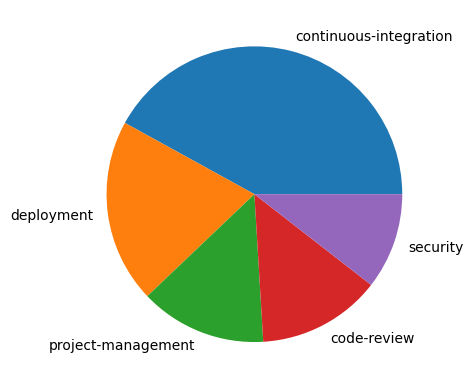

In [23]:
# visualise this proportion by means of a pie chart showing the 5 most frequent categories and collapsing all other categories into "others"
df_actions.groupby('primary_category').size().sort_values(ascending=False).head(5).plot.pie()